# Reachability

In [1]:
using Revise
using Interact
using MDPModelChecking
using DiscreteValueIteration
using POMDPSimulators
using BeliefUpdaters
includet("blind_gridworld.jl")

HTML{String}("    <script class='js-collapse-script'>\n        var curMatch =\n            window.location.href\n            .match(/(.*?)\\/notebooks\\/.*\\.ipynb/);\n\n        curMatch = curMatch ||\n            window.location.href\n            .match(/(.*?)\\/apps\\/.*\\.ipynb/);\n\n        if ( curMatch ) {\n            \$('head').append('<base href=\"' + curMatch[1] + '/\">');\n        }\n    </script>\n")

HTML{String}("<script class='js-collapse-script' src='/assetserver/d08a2caccce5639dcfc345cc4904ed9a058081cd-assets/webio/dist/bundle.js'></script>")

HTML{String}("<script class='js-collapse-script' src='/assetserver/d08a2caccce5639dcfc345cc4904ed9a058081cd-assets/providers/ijulia_setup.js'></script>")

HTML{String}("  <script class='js-collapse-script'>\n    \$('.js-collapse-script').parent('.output_subarea').css('padding', '0');\n  </script>\n")

## MDP Example with Value Iteration

In [2]:
mdp = SimpleGridWorld(size=(10,10), terminate_from=Set([GWPos(9,3), GWPos(4,3)]));

In [3]:
reach = Set([GWPos(7,7)])
avoid = mdp.terminate_from
solver = ReachabilitySolver(reach, avoid, ValueIterationSolver())

ReachabilitySolver{SArray{Tuple{2},Int64,1,2}}
  reach: Set{SArray{Tuple{2},Int64,1,2}}
  avoid: Set{SArray{Tuple{2},Int64,1,2}}
  solver: ValueIterationSolver


In [4]:
policy = solve(solver, mdp);

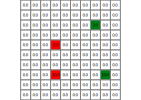

In [5]:
function POMDPModels.tocolor(r::Float64)
    minr = -1.0
    maxr = 1.0
    frac = (r-minr)/(maxr-minr)
    return get(ColorSchemes.redgreensplit, frac)
end

POMDPModels.render(mdp, Dict())#, color=s->value(policy, s))

## POMDP Example

In [6]:
using QMDP
using SARSOP
using POMDPPolicies
using BeliefUpdaters

┌ Info: Recompiling stale cache file /mnt/c/Users/Maxime/wsl/.julia/compiled/v1.0/SARSOP/Lsfa1.ji for SARSOP [cef570c6-3a94-5604-96b7-1a5e143043f2]
└ @ Base loading.jl:1184
┌ Warning: Package SARSOP does not have BeliefUpdaters in its dependencies:
│ - If you have SARSOP checked out for development and have
│   added BeliefUpdaters as a dependency but haven't updated your primary
│   environment's manifest file, try `Pkg.resolve()`.
│ - Otherwise you may need to report an issue with SARSOP
└ Loading BeliefUpdaters into SARSOP from project dependency, future warnings for SARSOP are suppressed.


In [7]:
pomdp = BlindGridWorld()

BlindGridWorld
  size: Tuple{Int64,Int64}
  exit: SArray{Tuple{2},Int64,1,2}
  simple_gw: SimpleGridWorld


In [8]:
solver = ReachabilitySolver(reach, avoid, QMDPSolver())

ReachabilitySolver{SArray{Tuple{2},Int64,1,2}}
  reach: Set{SArray{Tuple{2},Int64,1,2}}
  avoid: Set{SArray{Tuple{2},Int64,1,2}}
  solver: QMDPSolver


In [17]:
γ = 1 - 1e-2
POMDPs.discount(pomdp::BlindGridWorld) = γ
solver = SARSOPSolver(precision=0.5*1e-1*1/(1 - γ), timeout=5.0)
@show precision = 0.5*1/(1 - γ)
policy = solve(solver, pomdp)

precision = (0.5 * 1) / (1 - γ) = 49.99999999999996
Generating a pomdpx file: model.pomdpx

Loading the model ...
  input file   : model.pomdpx
  loading time : 0.03s 

SARSOP initializing ...
  initialization time : 0.01s

-------------------------------------------------------------------------------
 Time   |#Trial |#Backup |LBound    |UBound    |Precision  |#Alphas |#Beliefs  
-------------------------------------------------------------------------------
 0.01    0       0        5.04059    61.579     56.5384     4        1        
 0.01    1       75       28.7449    61.0049    32.26       4        39       
 0.03    1       100      28.7449    61.0049    32.26       22       64       
 0.06    2       163      39.5831    60.9433    21.3602     18       82       
 0.07    2       200      39.5831    60.9433    21.3602     34       119      
 0.12    3       267      44.3044    60.8272    16.5228     23       133      
 0.15    3       300      44.3044    60.8272    16.5228     39

AlphaVectorPolicy{BlindGridWorld,Symbol}(BlindGridWorld
  size: Tuple{Int64,Int64}
  exit: SArray{Tuple{2},Int64,1,2}
  simple_gw: SimpleGridWorld
, Array{Float64,1}[[45.8871, 47.1618, 48.6923, 50.3219, 52.0232, 53.7896, 55.6405, 57.9775, 59.7558, 61.2332  …  44.0454, 44.5855, 45.0037, 45.2971, 45.4735, 45.5714, 45.6148, 45.6312, 45.635, 0.0], [45.488, 46.7206, 48.2196, 49.8297, 51.5109, 53.2598, 55.1212, 57.2832, 59.6262, 61.2364  …  44.0829, 44.6959, 45.1998, 45.5566, 45.7901, 45.9169, 45.9801, 46.0031, 46.009, 0.0], [45.4821, 46.7222, 48.2251, 49.8371, 51.5232, 53.3134, 55.3118, 57.3869, 59.6637, 61.2419  …  44.0926, 44.7088, 45.2142, 45.5718, 45.8057, 45.9329, 45.9959, 46.0187, 46.0245, 0.0], [45.7584, 46.8489, 48.333, 49.9407, 51.6186, 53.361, 55.1671, 56.996, 58.5955, 61.3567  …  44.1432, 44.7366, 45.2283, 45.5739, 45.8001, 45.9213, 45.9822, 46.0042, 46.0106, 0.0], [46.0562, 47.3004, 48.816, 50.4432, 52.141, 53.9006, 55.6943, 57.335, 59.7272, 61.3235  …  44.1262, 44.6507, 45.0599

In [15]:
up = DiscreteUpdater(pomdp)
# policy = FunctionPolicy(s->:left)#RandomPolicy(MersenneTwister(1), pomdp, up);

In [16]:
b0 = uniform_belief(pomdp)
hr = HistoryRecorder(rng=MersenneTwister(1), max_steps=500)
s0 = GWPos(1,10)
hist = simulate(hr, pomdp, policy, up, b0, s0)
hsab = collect(eachstep(hist, "s, a, b, sp"))
@manipulate for step=1:n_steps(hist)
    s, a, b, sp = hsab[step]
    POMDPModels.render(pomdp.simple_gw, Dict(:s=>s), color=s->pdf(b, s))
#     @printf("action: %s, observation: %s\n", a, o)
end

Widget{:manipulate,Any}(OrderedDict{Symbol,Any}(:step=>Widget{:slider,Int64}(OrderedDict{Symbol,Any}(:changes=>Observable{Int64}("ob_12", 0, Any[SyncCallback(Scope("knockout-component-44d67012-8b38-421d-9ba3-98b79d77a914", Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :label), Any["step"], Dict{Symbol,Any}(:className=>"interact ",:style=>Dict{Any,Any}(:padding=>"5px 10px 0px 10px")), 1)], Dict{Symbol,Any}(:attributes=>Dict("style"=>"text-align:right;width:18%")), 2), Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :input), Any[], Dict{Symbol,Any}(:max=>500,:min=>1,:attributes=>Dict{Any,Any}(:type=>"range",Symbol("data-bind")=>"numericValue: value, valueUpdate: 'input', event: {change : function () {this.changes(this.changes()+1)}}","orient"=>"horizontal"),:step=>1,:className=>"slider slider is-fullwidth",:style=>Dict{Any,Any}()), 0)], Dict{Symbol,Any}(:attributes=>Dict("style"=>"flex-grow:1; margin: 0 2%")), 1), Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :p), Any[], Dict{Symbol,Any}(:attributes=>Dict("data-bind"=>"text: value")), 0)], Dict{Symbol,Any}(:attributes=>Dict("style"=>"width:18%")), 1)], Dict{Symbol,Any}(:attributes=>Dict("style"=>"display:flex; justify-content:center; align-items:center;")), 7), Dict{String,Tuple{Observables.AbstractObservable,Union{Nothing, Bool}}}("changes"=>(Observable{Int64}(#= circular reference @-6 =#), nothing),"value"=>(Observable{Int64}("ob_11", 250, Any[SyncCallback(Scope(#= circular reference @-6 =#), SyncCallback(Scope(#= circular reference @-7 =#), ##40#42{Scope,String}(Scope(#= circular reference @-8 =#), "value"))), #g#15{##16#17{##23#26,Observable{Any}},Tuple{Observable{Int64}}}(##16#17{##23#26,Observable{Any}}(##23#26(), Observable{Any}("ob_13", Context(Context(Context(R,f),Context(R,f),Context(R,f),Context(R,f),Context(R,f),Context(R,f),Context(R,f),Context(R,f),Context(R,f),Context(R,f),Context(R,f),Context(R,f),Context(R,f),Context(R,f),Context(R,f),Context(R,f),Context(R,f),Context(R,f),Context(R,f),Context(R,f),Context(R,f),Context(R,f),Context(R,f),Context(R,f),Context(R,f),Context(R,f),Context(R,f),Context(R,f),Context(R,f),Context(R,f),Context(R,f),Context(R,f),Context(R,f),Context(R,f),Context(R,f),Context(R,f),Context(R,f),Context(R,f),Context(R,f),Context(R,f),Context(R,f),Context(R,f),Context(R,f),Context(R,f),Context(R,f),Context(R,f),Context(R,f),Context(R,f),Context(R,f),Context(R,f),Context(R,f),Context(R,f),Context(R,f),Context(R,f),Context(R,f),Context(R,f),Context(R,f),Context(R,f),Context(R,f),Context(R,f),Context(R,f),Context(R,f),Context(R,f),Context(R,f),Context(R,f),Context(R,f),Context(R,f),Context(R,f),Context(R,f),Context(R,f),Context(R,f),Context(R,f),Context(R,f),Context(R,f),Context(R,f),Context(R,f),Context(R,f),Context(R,f),Context(R,f),Context(R,f),Context(R,f),Context(R,f),Context(R,f),Context(R,f),Context(R,f),Context(R,f),Context(R,f),Context(R,f),Context(R,f),Context(R,f),Context(R,f),Context(R,f),Context(R,f),Context(R,f),Context(R,f),Context(R,f),Context(R,f),Context(R,f),Context(R,f),Context(R,f),s,lw),Context(Context(T),Context(T),Context(T),Context(T),Context(T),Context(T),Context(T),Context(T),Context(T),Context(T),Context(T),Context(T),Context(T),Context(T),Context(T),Context(T),Context(T),Context(T),Context(T),Context(T),Context(T),Context(T),Context(T),Context(T),Context(T),Context(T),Context(T),Context(T),Context(T),Context(T),Context(T),Context(T),Context(T),Context(T),Context(T),Context(T),Context(T),Context(T),Context(T),Context(T),Context(T),Context(T),Context(T),Context(T),Context(T),Context(T),Context(T),Context(T),Context(T),Context(T),Context(T),Context(T),Context(T),Context(T),Context(T),Context(T),Context(T),Context(T),Context(T),Context(T),Context(T),Context(T),Context(T),Context(T),Context(T),Context(T),Context(T),Context(T),Context(T),Context(T),Context(T),Context(T),Context(T),Context(T),Context(T),Context(T),Context(T),Context(T),Context(T),Context(T),Context(T),Contex

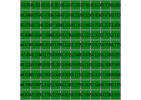

In [20]:
function deterministic_belief(pomdp, s)
    b = zeros(n_states(pomdp))
    si = stateindex(pomdp, s)
    b[si] = 1.0
    return DiscreteBelief(pomdp, b)
end
POMDPModels.render(mdp, Dict(), color=s->value(policy, deterministic_belief(pomdp, s)))